# Spectral Clustering

### Tran Quoc Long - 14520490

## Bài tập 2: Handwritting digits

### K-means

In [34]:
#import libs
from time import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
#import scikit-learn
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

In [36]:
digits = load_digits();
print(digits.data.shape);

(1797, 64)


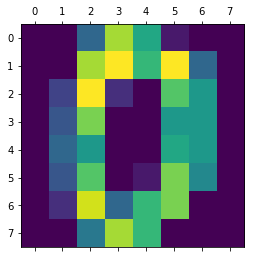

In [37]:
%matplotlib inline
#plt.gray(); 
plt.matshow(digits.images[0]);

In [38]:
nClusters = 10
model1 = KMeans(nClusters)
labels_kmeans = model1.fit_predict(digits.data)

In [39]:
df = pd.DataFrame({'labels':labels,'Truth labels':digits.target})
ct = pd.crosstab(df['labels'],df['Truth labels'])
print(ct)

Truth labels    0   1    2    3    4    5    6    7    8    9
labels                                                       
0               0   1   13  155    0    1    0    0    2    6
1               0   2    0    0    0    1  177    0    2    0
2               0  55    2    0    3    0    1    2    6   20
3             177   0    1    0    0    0    1    0    0    0
4               0   0    2   12    0   42    0    0   52  139
5               0   0    4    7   11    0    0  175    5    8
6               0  99    8    7    2    0    2    2  100    1
7               0  24  147    0    0    0    0    0    3    0
8               0   1    0    2    0  136    0    0    4    6
9               1   0    0    0  165    2    0    0    0    0


Predict Label: 8
Truth:  0


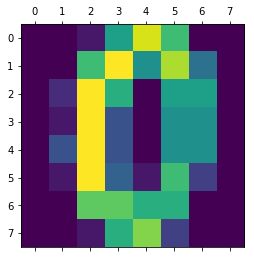

In [40]:
n = 10
%matplotlib inline
plt.matshow(digits.images[n])
print('Predict Label:', labels_kmeans[n])
print('Truth: ', digits.target[n])

### Visualization - Kmeans

In [41]:
#import libs
import numpy as np
from sklearn.decomposition import PCA

##### PCA

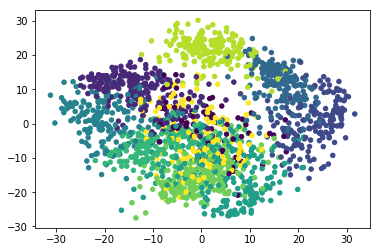

In [42]:
nComponents = 2
vPCA = PCA(nComponents)
digitData_to_2D = vPCA.fit_transform(digits.data)
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= labels_kmeans, s=20)
plt.show()

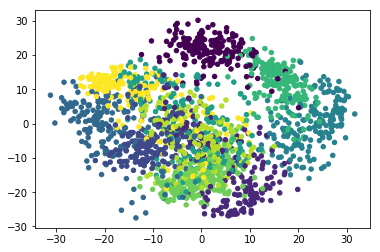

In [43]:
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= digits.target, s=20)
plt.show()

## Speactral clustering

In [44]:
# Spectral_clustering

from sklearn.cluster import spectral_clustering
from sklearn.feature_extraction import image
import numpy as np
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import cosine_similarity

# dist = DistanceMetric.get_metric('euclidean')
# graph=dist.pairwise(digits.data) 

graph = cosine_similarity(digits.data)
label_spectral = spectral_clustering(graph, n_clusters=10)

In [45]:
df1 = pd.DataFrame({'labels':label_spectral,'Truth labels':digits.target})
ct2 = pd.crosstab(df1['labels'],df1['Truth labels'])
print(ct2)

Truth labels    0   1    2    3    4    5    6    7    8    9
labels                                                       
0               0  58    5    5    1    0    0   15   40   36
1               0   0    1  146    0    0    0    0    6    2
2               0   0    0    4    0  157    0    0    3    3
3               0   2    0    1    0    2  172    0   13    0
4               0   0    0   16    0   20    2    0    7  133
5             177   0    1    0    1    1    0    0    0    3
6               0   0    2    2   11    0    0  154    3    2
7               0  36  115    4    0    0    0    0    1    0
8               1   0    0    0  163    2    0    0    0    0
9               0  86   53    5    5    0    7   10  101    1


lables_predict: 2
 True:  5


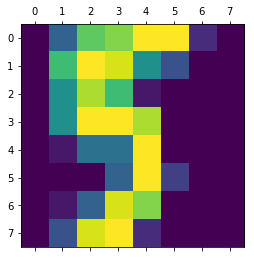

In [46]:
n = 15
plt.matshow(digits.images[n])
print('lables_predict:',label_spectral[n])
print(' True: ', digits.target[n])

#### Visualization - Spectral Clustering


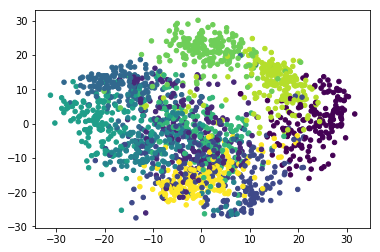

In [15]:
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= label_spectral, s=20)
plt.show()

### Visualize results to compare - Using PCA

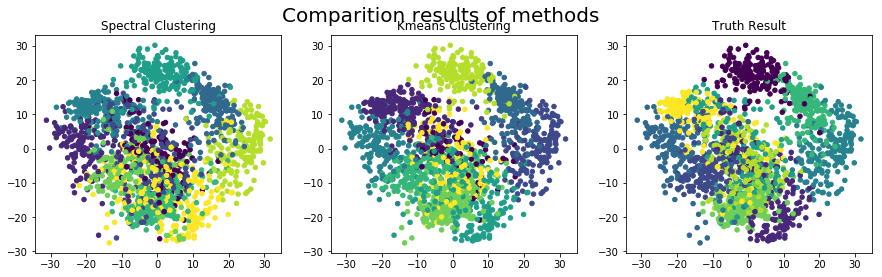

In [58]:
fig = plt.figure(figsize=(15,4))
fig.suptitle('Comparition results of methods', fontsize=20)

ax = fig.add_subplot(1,3,1)
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= label_spectral, s=20)
ax.set_title('Spectral Clustering')

ax = fig.add_subplot(1,3,2)
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= labels_kmeans, s=20)
ax.set_title('Kmeans Clustering')

ax = fig.add_subplot(1,3,3)
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= digits.target, s=20)
ax.set_title('Truth Result')

### 